## Visualized Pre-processed Nodules

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds

nodule_roi_root = "./processed_data_roi/lungs_roi/"
nodule_mask_root = "./processed_data_roi/nodule_mask/"
filenames = list(map(lambda x: x.split("lungs")[1], list(filter(lambda x: x.endswith(".npy"), os.listdir(nodule_roi_root)))))

2217
_9_1_145_1.npy
(512, 512)


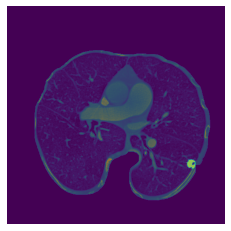

In [11]:
print(len(filenames))

mask_img = np.load(nodule_mask_root + "masks" + filenames[1])
roi_img = np.load(nodule_roi_root + "lungs" + filenames[1])

plt.imshow(mask_img)
plt.imshow(roi_img, alpha=0.5)

print(filenames[1])
print(roi_img.shape)

plt.axis('off')
plt.show()

In [4]:
import luna16_roi  # Register `my_dataset`

ds = tfds.load('luna16_roi')  # `my_dataset` registered

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-03 18:10:30.182901: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-03 18:10:30.183500: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# Load the data using ImageDataGenerator
data_gen = ImageDataGenerator(rescale=1./255)
data_gen_flow = data_gen.flow_from_directory(
    directory='./processed_data/lungs_roi/',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=1
)

num_samples = len(filenames)

# Split the data into train, validation, and test sets
train_samples = int(num_samples * 0.7)
val_samples   = int(num_samples * 0.2)
test_samples  = num_samples - train_samples - val_samples

# Create new generators for train, validation, and test sets
train_gen = data_gen_flow[:train_samples]
val_gen = data_gen_flow[train_samples:train_samples+val_samples]
test_gen = data_gen_flow[train_samples+val_samples:]

FileNotFoundError: [Errno 2] No such file or directory: './processed_data/lungs_roi/'